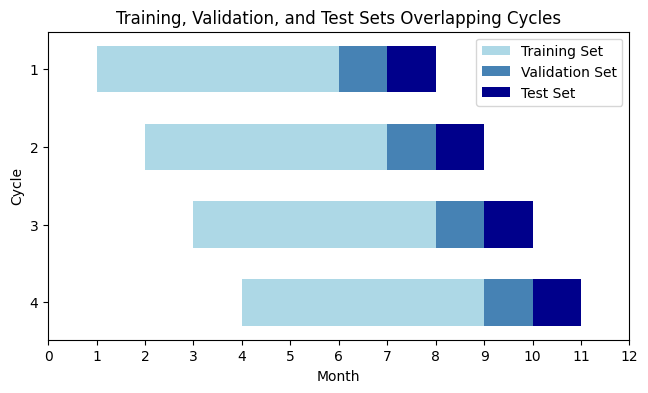

In [1]:
import matplotlib.pyplot as plt
import numpy as np

cycles = np.array([1, 2, 3, 4])
train_duration = 6
val_duration = 1
test_duration = 1
overlap_size = 1

train_start = cycles
train_end = cycles + train_duration

val_start = cycles + train_duration - overlap_size
val_end = cycles + train_duration + val_duration - overlap_size

test_start = cycles + train_duration + val_duration - overlap_size
test_end = cycles + train_duration + val_duration + test_duration - overlap_size

plt.figure(figsize=(7.5, 4))

bar_width = 0.6

plt.barh(cycles, train_end - train_start, left=train_start, height=bar_width, color='lightblue', label='Training Set')
plt.barh(cycles, val_end - val_start, left=val_start, height=bar_width, color='steelblue', label='Validation Set')
plt.barh(cycles, test_end - test_start, left=test_start, height=bar_width, color='darkblue', label='Test Set')

plt.title('Training, Validation, and Test Sets Overlapping Cycles')
plt.xlabel('Month')
plt.ylabel('Cycle')
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(1, 5, 1))  
plt.gca().invert_yaxis()  
plt.legend()
plt.grid(False)
plt.show()

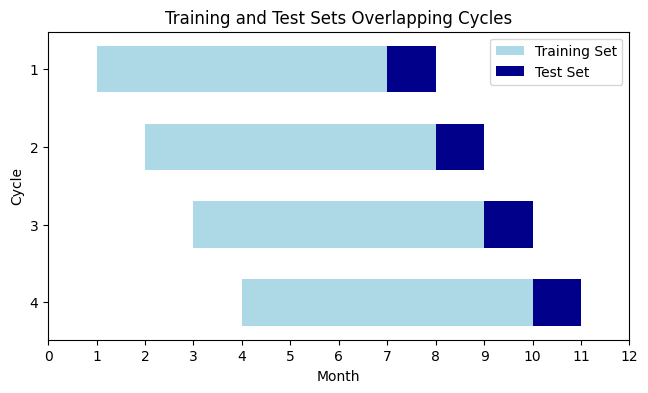

In [2]:
import matplotlib.pyplot as plt
import numpy as np

cycles = np.array([1, 2, 3, 4])
train_duration = 7
test_duration = 1
overlap_size = 1

train_start = cycles
train_end = cycles + train_duration


test_start = cycles + train_duration - overlap_size
test_end = cycles + train_duration + test_duration - overlap_size

plt.figure(figsize=(7.5, 4))

bar_width = 0.6

plt.barh(cycles, train_end - train_start, left=train_start, height=bar_width, color='lightblue', label='Training Set')
plt.barh(cycles, test_end - test_start, left=test_start, height=bar_width, color='darkblue', label='Test Set')

plt.title('Training and Test Sets Overlapping Cycles')
plt.xlabel('Month')
plt.ylabel('Cycle')
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(1, 5, 1))
plt.gca().invert_yaxis()
plt.legend()
plt.grid(False)
plt.show()

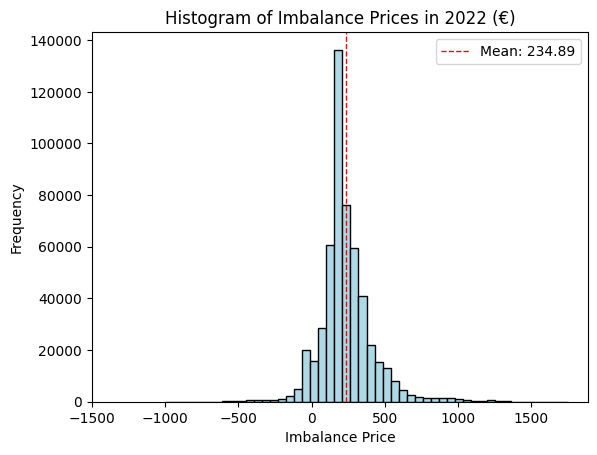

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('preprocessed_data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df.set_index('Date', inplace=True)
df.index = df.index.tz_convert('Europe/Amsterdam')
imbalance_prices = df['Final_Price']

plt.hist(imbalance_prices, bins=50, color='lightblue', edgecolor='black')
plt.xlabel('Imbalance Price')
plt.ylabel('Frequency')
plt.xticks(np.arange(-1500, 2000, 500))
plt.title('Histogram of Imbalance Prices in 2022 (€)')

mean_price = imbalance_prices.mean()
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')
plt.legend()

plt.show()


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_611/2997398794.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_avg_100_cheapest = df['Final_Price'].groupby(df.index.to_period("M")).nsmallest(100).groupby(level=0).mean()
/tmp/ipykernel_611/2997398794.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_avg_100_most_expensive = df['Final_Price'].groupby(df.index.to_period("M")).nlargest(100).groupby(level=0).mean()
/tmp/ipykernel_611/2997398794.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_avg_2500_cheapest = df['Final_Price'].groupby(df.index.to_period("M")).nsmallest(2500).groupby(level=0).mean()
/tmp/ipykernel_611/2997398794.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_avg_2500_most_expensive = df['Final_Price'].groupby(df.index.to_period("M")).nlargest(2500).groupby(level=0).m

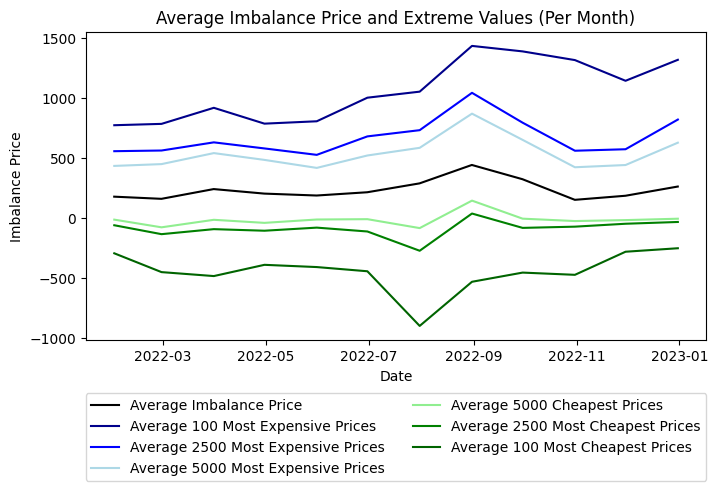

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('preprocessed_data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df.set_index('Date', inplace=True)
df.index = df.index.tz_convert('Europe/Amsterdam')
df = df["2022-01-01 00:00:00+01:00":"2022-12-31 00:00:00+01:00"]

monthly_avg_imbalance_price = df['Final_Price'].resample('M').mean()
monthly_avg_100_cheapest = df['Final_Price'].groupby(df.index.to_period("M")).nsmallest(100).groupby(level=0).mean()
monthly_avg_100_most_expensive = df['Final_Price'].groupby(df.index.to_period("M")).nlargest(100).groupby(level=0).mean()
monthly_avg_2500_cheapest = df['Final_Price'].groupby(df.index.to_period("M")).nsmallest(2500).groupby(level=0).mean()
monthly_avg_2500_most_expensive = df['Final_Price'].groupby(df.index.to_period("M")).nlargest(2500).groupby(level=0).mean()
monthly_avg_5000_cheapest = df['Final_Price'].groupby(df.index.to_period("M")).nsmallest(5000).groupby(level=0).mean()
monthly_avg_5000_most_expensive = df['Final_Price'].groupby(df.index.to_period("M")).nlargest(5000).groupby(level=0).mean()

plt.figure(figsize=(8, 4))

plt.plot(monthly_avg_imbalance_price, color='k', linestyle='-', label='Average Imbalance Price')

plt.plot(monthly_avg_100_most_expensive, color='darkblue', linestyle='-', label='Average 100 Most Expensive Prices')

plt.plot(monthly_avg_2500_most_expensive, color='blue', linestyle='-', label='Average 2500 Most Expensive Prices')

plt.plot(monthly_avg_5000_most_expensive, color='lightblue', linestyle='-', label='Average 5000 Most Expensive Prices')

plt.plot(monthly_avg_5000_cheapest, color='lightgreen', linestyle='-', label='Average 5000 Cheapest Prices')

plt.plot(monthly_avg_2500_cheapest, color='green', linestyle='-', label='Average 2500 Most Cheapest Prices')

plt.plot(monthly_avg_100_cheapest, color='darkgreen', linestyle='-', label='Average 100 Most Cheapest Prices')

plt.xlabel('Date')
plt.ylabel('Imbalance Price')
plt.title('Average Imbalance Price and Extreme Values (Per Month)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()


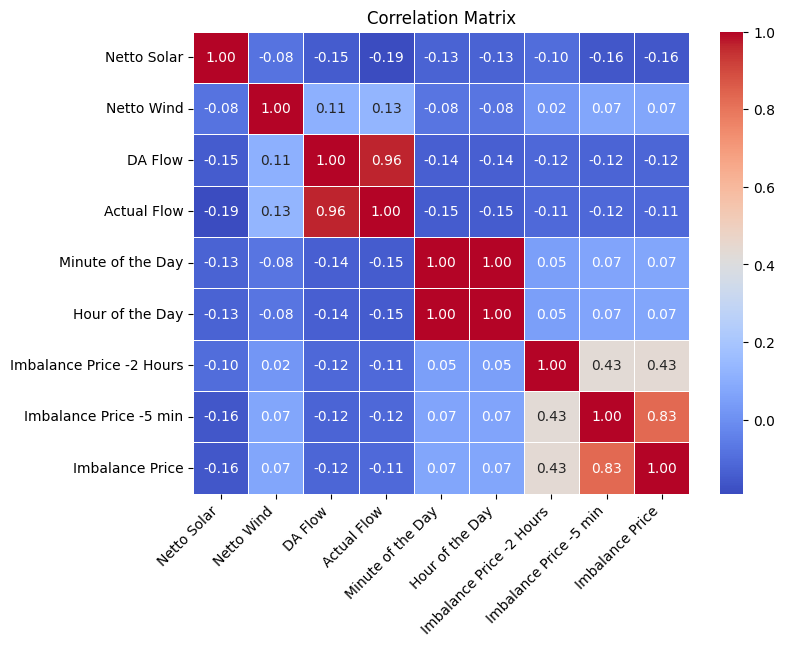

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('preprocessed_data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df.set_index('Date', inplace=True)
df.index = df.index.tz_convert('Europe/Amsterdam')
df = df["2022-01-01 00:00:00+01:00":"2022-12-31 00:00:00+01:00"]

X = df[[
    'NETTO SOLAR',
    'NETTO WIND',
    'DA Scheduled Flow',
    'Scheduled Flow', 
    'MinuteOfDay', 
    'HourOfDay',
    'Imbalance_Price -2H',
    'Imbalance_Price -5m'
]]

y = df[['Final_Price']]

X.columns = [
    'Netto Solar',
    'Netto Wind',
    'DA Flow',
    'Actual Flow',
    'Minute of the Day',
    'Hour of the Day',
    'Imbalance Price -2 Hours',
    'Imbalance Price -5 min'
]
y.columns = ['Imbalance Price']

data_for_correlation = pd.concat([X, y], axis=1)

correlation_matrix = data_for_correlation.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()
